In [6]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:燈會

北港燈會取消規畫5大賞燈點分散人潮紓壓抗疫- 雲林縣
https://www.chinatimes.com/realtimenews/20210127005157-260421
2021南部過年景點總整理！年度最美山中燈會、唯一「科學園區考古館」黑白幾何風格…讓你拍到手軟
https://www.marieclaire.com.tw/lifestyle/travel/55112
南投燈會正常驗收測燈 縣府：春節白天可參觀、晚間不開燈
https://news.ltn.com.tw/news/life/breakingnews/3424042
南投燈會延期 縣府：春節白天可參觀
https://news.ltn.com.tw/news/life/paper/1428372
半世紀高港候工室轉型旅宿 明年燈會前營運
https://news.ltn.com.tw/news/life/breakingnews/3424265
不斷更新／防疫優先！全台大型活動停辦、延期一次看 TVBS ...
https://news.tvbs.com.tw/fun/1454682
加強防疫規格 花縣府規定東大門夜市禁試吃
https://udn.com/news/story/7328/5210224
18宮廟防疫 春節活動取消
https://www.chinatimes.com/newspapers/20210128000577-260107
春節防疫不鬆懈 新北宮廟齊心守護過好年
https://newtalk.tw/news/view/2021-01-28/529759
陽明山花季、內湖夜櫻季取消 民眾賞花將控管人流
https://www.cna.com.tw/news/firstnews/202101280089.aspx


,標題,連結
0,北港燈會取消規畫5大賞燈點分散人潮紓壓抗疫- 雲林縣,https://www.chinatimes.com/realtimenews/202101...
1,2021南部過年景點總整理！年度最美山中燈會、唯一「科學園區考古館」黑白幾何風格…讓你拍到手軟,https://www.marieclaire.com.tw/lifestyle/trave...
2,南投燈會正常驗收測燈 縣府：春節白天可參觀、晚間不開燈,https://news.ltn.com.tw/news/life/breakingnews...
3,南投燈會延期 縣府：春節白天可參觀,https://news.ltn.com.tw/news/life/paper/1428372
4,半世紀高港候工室轉型旅宿 明年燈會前營運,https://news.ltn.com.tw/news/life/breakingnews...
5,不斷更新／防疫優先！全台大型活動停辦、延期一次看 TVBS ...,https://news.tvbs.com.tw/fun/1454682
6,加強防疫規格 花縣府規定東大門夜市禁試吃,https://udn.com/news/story/7328/5210224
7,18宮廟防疫 春節活動取消,https://www.chinatimes.com/newspapers/20210128...
8,春節防疫不鬆懈 新北宮廟齊心守護過好年,https://newtalk.tw/news/view/2021-01-28/529759
9,陽明山花季、內湖夜櫻季取消 民眾賞花將控管人流,https://www.cna.com.tw/news/firstnews/20210128...


In [7]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
# articleContent

article = []
for p in articleContent:
    article.append(p.text)


articleAll = '\n'.join(article)
# print(articleAll)

# 分段用

https://www.chinatimes.com/realtimenews/20210127005157-260421


In [8]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

搜索引擎模式: 雲林/ 雲林縣/ 政府/ 因應/ 防疫/ 今年/ 取消/ 北港/ 燈會/ 但/ 為/ 讓/ 民眾/ 感受/ 春新/ 氛圍/ 藉/ 此/ 放鬆/ 心情/ 抗疫/ 在/ 北港/ 港鎮/ 北港鎮/ 規畫/ 水道/ 頭/ 文化/ 園區/ 思齊/ 顏思齊/ 紀念/ 紀念碑/ 圓環/ 老街/ 巷弄/ 等/ 5/ 大/ 賞燈/ 點/ 分散/ 的/ 賞燈/ 點/ 可/ 避免/ 人群/ 過度/ 集中/ 讓/ 新春/ 出遊/ 不僅/ 有/ 看頭/ 且/ 更/ 安全/ 
/ 
/ 去年/ 北港/ 燈會/ 不/ 受/ 新冠/ 肺炎/ 疫情/ 影響/ 於/ 2/ 月/ 登場/ 但/ 今年/ 面對/ 疫情/ 不斷/ 升溫/ 雲林/ 雲林縣/ 政府/ 基於/ 防疫/ 考量/ 本月/ 20/ 日/ 宣布/ 取消/ 北港/ 燈會/ 改以/ 策展/ 方式/ 在/ 北港/ 港鎮/ 北港鎮/ 規畫/ 5/ 大/ 賞燈/ 點/ 希望/ 大家/ 藉由/ 賞燈/ 紓壓/ 抗疫/ 
/ 
/ 雲林/ 雲林縣/ 政府/ 表示/ 北港/ 5/ 大/ 賞燈/ 點以/ 2021/ 燈會/ 原鄉/ 北港/ 時光/ 蘊河/ 為/ 主題/ 分別/ 在/ 朝天/ 天宮/ 朝天宮/ 媽祖/ 祖廟/ 媽祖廟/ 水道/ 頭/ 文化/ 園區/ 思齊/ 顏思齊/ 圓環/ 老街/ 巷弄/ 中山/ 山路/ 中山路/ 尾/ 入口/ 意象/ 結合/ 光/ 與/ 藝術/ 形塑/ 年節/ 歡樂/ 氣氛/ 配合/ 香火/ 鼎盛/ 的/ 北港/ 媽祖/ 讓/ 民眾/ 感受/ 安心/ 與/ 溫暖/ 氛圍/ 
/ 
/ 去年/ 北港/ 燈會/ 原主/ 展場/ 水道/ 頭/ 文化/ 園區/ 今年/ 以水/ 與/ 光為/ 主軸/ 串聯/ 整個/ 園區/ 並/ 把/ 眾多/ 老樹/ 融入/ 其/ 中/ 讓/ 民眾/ 彷彿/ 來到/ 水漾/ 森林/ 祕境/ 感受/ 北港/ 傳統/ 燈藝/ 與/ 現代/ 燈組/ 的/ 藝術/ 響宴/ 
/ 
/ 今年/ 是/ 思齊/ 顏思齊/ 開台/ 400/ 周年/ 因此/ 特別/ 在/ 思齊/ 顏思齊/ 圓環/ 規畫/ 400/ 年前/ 思齊/ 顏思齊/ 率眾/ 來台/ 開墾/ 的/ 意象/ 燈組/ 讓/ 民眾/ 賞燈/ 之餘/ 也/ 能/ 了解/ 北港/ 地區/ 在/ 開台/ 歷史/ 的/ 重要/ 重要性/ 
/

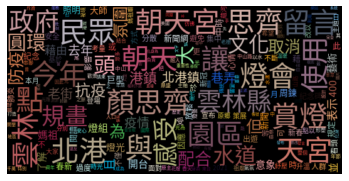

<Figure size 20000x20000 with 0 Axes>

In [9]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
# dicition = Counter(terms)
# print(Counter(terms))








        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(50,50),dpi= 400)
plt.show()

# plt.savefig("asdfghjkl.png")
wc.to_file("img/demo07.png")


In [5]:

newsDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
newsDf.sort_values(by= ['詞頻'], ascending= False)

,詞頻
例,7
日,5
個案,5
月,5
\n,5
...,...
偉婷,1
台北,1
其,1
28,1
